In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

from statsmodels.stats import proportion

import statsmodels.api as sm

import statsmodels.stats.multicomp as mc

In [2]:
df=pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df.shape

(2000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [5]:
df.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [6]:
df['Club'].isnull().sum()/len(df)*100

0.95

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

In [9]:
df.shape

(1981, 15)

# a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

<AxesSubplot:xlabel='Age', ylabel='Density'>

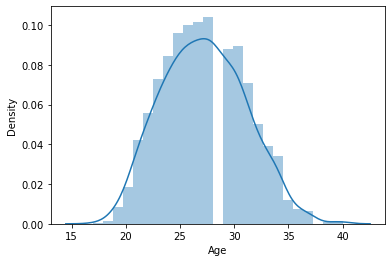

In [10]:
sns.distplot(df['Age'])

In [11]:
mu=round(np.mean(df['Age']),2)
sigma=round(np.std(df['Age']),2)
print("Population Mean(mu):",mu)
print("Population Standard deviation(sigma):",sigma)

Population Mean(mu): 27.22
Population Standard deviation(sigma): 3.85


In [12]:
list_mean=[]
sample_size=200
no_of_samples=100
for i in range(1,101):
    sample=np.random.choice(df['Age'],size=sample_size)
    sample_mean=np.mean(sample)
    sample_std=np.std(sample)
    list_mean.append(sample_mean)
print(len(list_mean))

100


In [13]:
n=200
se=sigma/np.sqrt(n)
print('Standard Error:',round(se,2))
print('Mean of Sampling Distribution:',round(np.mean(list_mean),2))

Standard Error: 0.27
Mean of Sampling Distribution: 27.24


<AxesSubplot:xlabel='Age', ylabel='Density'>

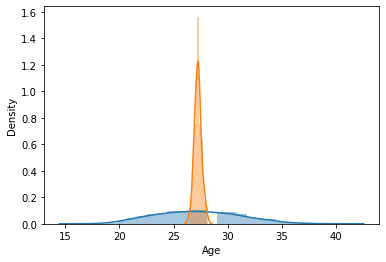

In [14]:
sns.distplot(df['Age'])
sns.distplot(list_mean)

In [15]:
#With increase in sample size the sample mean gets closer to the population mean and therefore the distribution gets 
#narrower,hence the standard error decreases

# b)Is there any evidence that the players overall rating is greater than 80?

In [16]:
#Ho: mu<=80
#H1: mu>80

In [17]:
mu=80
n=len(df['Overall_rating'])
x_bar=df['Overall_rating'].mean()
s=np.std(df['Overall_rating'],ddof=1)
t_stat=(x_bar-mu)/(s/(n**0.5))
t_stat

-24.161970492711102

In [18]:
p_val=stats.t.sf(abs(t_stat),df=n-1)
p_val

1.5003473423359258e-113

In [19]:
sl=0.05
if p_val>=sl:
    print('Fail to reject Ho')
else:
    print('Reject Ho')

Reject Ho


In [20]:
#Hence the players overall rating is greater than 80

# c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [21]:
df['Preferred Foot'].value_counts()

Right    1519
Left      462
Name: Preferred Foot, dtype: int64

In [22]:
#Ho: Preferred foot has no impact on potential (independent)
#H1: Preferred foot has impact on potential    (not independent)

In [23]:
pot_right = df[df['Preferred Foot'] == 'Right']['Potential']
pot_left = df[df['Preferred Foot'] == 'Left']['Potential']

In [24]:
#test for normal distribution
print(stats.shapiro(pot_right))
print(stats.shapiro(pot_left))

ShapiroResult(statistic=0.9373535513877869, pvalue=8.425229710834448e-25)
ShapiroResult(statistic=0.9437844157218933, pvalue=3.187897645515192e-12)


In [25]:
#test for equal variance
stats.levene(pot_right,pot_left) #pval>0.05

LeveneResult(statistic=1.5665635192734586, pvalue=0.2108546965781491)

In [26]:
stat,p_val=stats.f_oneway(pot_right,pot_left)
stat,p_val                                   #p_val>0.05

(2.6621845772621833, 0.10291861885209323)

In [27]:
#p-value is greater than 0.05, hence fail to reject Ho and concluding that preferred foot has impact on potential

<AxesSubplot:xlabel='Potential', ylabel='Density'>

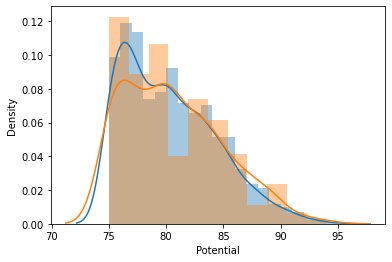

In [28]:
sns.distplot(pot_right)
sns.distplot(pot_left)

# d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].¶

In [30]:
# H0 : The variable overall rating and potential are independent
# H1 : The variable overall rating and potential are Dependent.

In [31]:
df.corr()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
Age,1.000000,0.065415,-0.511813,0.317207,-0.060779,-0.203928,-0.036914,0.069289,0.149615
Overall_rating,0.065415,1.000000,0.732086,0.661631,0.104497,0.083036,-0.096322,0.041389,0.054398
Potential,-0.511813,0.732086,1.000000,0.326561,0.099751,0.127850,-0.039918,0.029916,-0.017479
International Reputation,0.317207,0.661631,0.326561,1.000000,0.105721,0.088159,-0.033793,0.044504,0.070266
Weak Foot,-0.060779,0.104497,0.099751,0.105721,1.000000,0.342575,0.040300,-0.188258,-0.199720
Skill Moves,-0.203928,0.083036,0.127850,0.088159,0.342575,1.000000,0.064169,-0.474081,-0.529191
Jersey Number,-0.036914,-0.096322,-0.039918,-0.033793,0.040300,0.064169,1.000000,0.003525,-0.016596
Height,0.069289,0.041389,0.029916,0.044504,-0.188258,-0.474081,0.003525,1.000000,0.545304
Weight,0.149615,0.054398,-0.017479,0.070266,-0.199720,-0.529191,-0.016596,0.545304,1.000000


In [32]:
stats.pearsonr(df['Overall_rating'],df['Potential'])

(0.7320858358909942, 0.0)

In [33]:
#Since P_value is less than significance level we reject the null hypothesis and conclude that overall rating and potential
#are dependent

# e)Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.¶# 

In [34]:
# H0 : The variable overall rating and skill are independent
# H1 : The variable overall rating and skill are Dependent.

In [35]:
x1_bar = df['Skill Moves'].mean()
x2_bar = df['Overall_rating'].mean()
s1 = df['Skill Moves'].std()
s2 = df['Overall_rating'].std()
n1 = len(df['Skill Moves'])
n2 = len(df['Overall_rating'])
z_stat = (x1_bar-x2_bar)/np.sqrt((s1**2/n1)+(s2**2/n2))
print('Z_stat',z_stat)
p_val=stats.norm.sf(abs(z_stat))*2
print('P-value',p_val)
#pvalue < 0.05 hence we can reject the null hypothesis

Z_stat -976.4188932734295
P-value 0.0


In [36]:
stats.pearsonr(df['Overall_rating'],df['Skill Moves'])

(0.08303643058332785, 0.00021570230856720446)

<AxesSubplot:xlabel='Overall_rating', ylabel='Density'>

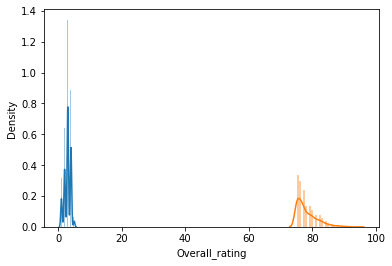

In [37]:
sns.distplot(df['Skill Moves'])
sns.distplot(df['Overall_rating'])

In [38]:
df1=pd.read_csv('phone.csv')
df1.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [39]:
df1.shape

(820, 6)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [41]:
df1.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

# a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.¶

In [42]:
x_bar=df1['duration'].mean()
s=df1['duration'].std()
n=len(df1['duration'])
cl1=0.95
cl2=0.99

In [43]:
stats.t.interval(loc=x_bar,scale=s/n**0.5,alpha=cl1,df=n-1)

(141.17321160796186, 147.43665951170905)

In [44]:
stats.t.interval(loc=x_bar,scale=s/n**0.5,alpha=cl2,df=n-1)

(140.185636073024, 148.4242350466469)

# b)Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [45]:
df1['network'].value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

<AxesSubplot:xlabel='network', ylabel='Density'>

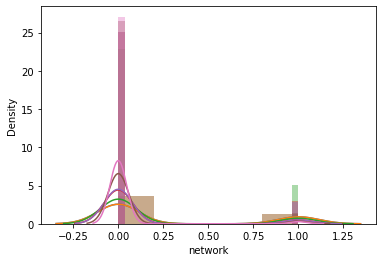

In [46]:
sns.distplot(df1['network']=='Vodafone')
sns.distplot(df1['network']=='Three')
sns.distplot(df1['network']=='data')
sns.distplot(df1['network']=='Meteor')
sns.distplot(df1['network']=='Tesco')
sns.distplot(df1['network']=='landline')
sns.distplot(df1['network']=='voicemail')

In [47]:
# given observed values
observed_value = [215,215,150,87,84,42,27]

# expected percentage 
exp_count = [14.29,14.29,14.29,14.29,14.29,14.29,14.29]

# calculate the expected values for each category
expected_value = np.array(exp_count) * len(df1)

# round-off the values to integers
expected_value = round(pd.Series(expected_value))

stat, p_value = stats.chisquare(f_obs = observed_value, f_exp = expected_value)

print('p-value:', p_value)

p-value: 0.0


# c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.¶

<AxesSubplot:xlabel='duration', ylabel='Density'>

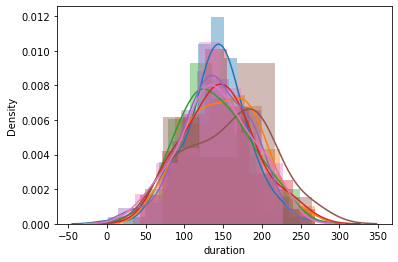

In [48]:
n1 = df1[df1['network'] == 'data']['duration']
n2 = df1[df1['network'] == 'Vodafone']['duration']
n3 = df1[df1['network'] == 'Meteor']['duration']
n4 = df1[df1['network'] == 'Tesco']['duration']
n5 = df1[df1['network'] == 'Three']['duration']
n6 = df1[df1['network'] == 'voicemail']['duration']
n7 = df1[df1['network'] == 'landline']['duration']
sns.distplot(n1)
sns.distplot(n2)
sns.distplot(n3)
sns.distplot(n4)
sns.distplot(n5)
sns.distplot(n6)
sns.distplot(n7)

# d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [49]:
df1['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

<AxesSubplot:xlabel='duration', ylabel='Density'>

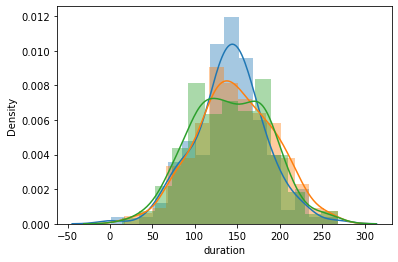

In [50]:
item_data = df1[df1['item'] == 'data']['duration']
item_call = df1[df1['item'] == 'call']['duration']
item_sms = df1[df1['item'] == 'sms']['duration']
sns.distplot(item_data)
sns.distplot(item_call)
sns.distplot(item_sms)

In [51]:
#Ho: Independent
#H1: Not Independent
stats.f_oneway(item_data,item_call,item_sms)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

In [52]:
# Since p value is greater than 0.05 we fail to reject the null hypothesis, concluding that both are not in relation

# e)Perform statistical tests to identify the relation between network and network_type.¶

In [53]:
#Ho: Independent
#H1: Not Independent

In [54]:
pd.crosstab(df1['network'],df1['network_type'])

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [55]:
test_stat, pval, dof, expected_value=stats.chi2_contingency(pd.crosstab(df1['network'],df1['network_type']))

In [56]:
print("Test statistic:", test_stat)
print("p-value:", pval)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 2460.0
p-value: 0.0
Degrees of freedom: 18
Expected values: [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]


In [57]:
# Since p Value is less than significance level we can reject the null hypothesis,concluding that network and network_type
#has some relation